In [ ]:
!pip install python-dotenv numpy pandas matplotlib huggingface_hub datasets openai tiktoken

In [15]:
from dotenv import load_dotenv
load_dotenv()

True

In [11]:
from datasets import load_dataset

dataset = load_dataset("LeoTungAnh/electricity_hourly")

In [13]:
import json

with open("few_shots.jsonl", "w") as f:
    for series in dataset["train"]:
        f.write(json.dumps([round(1000*x)/1000 for x in series["target"][:100]])+"\n")

In [47]:
prompt = {"model": "gpt-4-turbo", "temperature": 0.8, "max_tokens": 4096, "messages": [
        {"role": "system", "content": """You are a synthetic data generator, you generate 10 rows similar to the user examples, but different.
You output the rows without more comment."""},
        {"role": "user", "content": "\n".join([json.dumps([round(1000*x)/1000 for x in series["target"][:100]]) for series in dataset["train"]][:10])},
]}
print(prompt[ "messages"][1]["content"])

[-0.194, -0.089, -0.194, -0.089, -0.141, -0.141, -0.089, -0.194, -0.456, -0.036, 1.751, 0.7, 0.122, -0.562, 0.7, 1.068, -0.509, 1.015, 1.699, -0.194, 0.437, 2.172, 1.12, 0.7, -0.246, -0.194, -0.246, -0.194, -0.246, -0.299, -0.351, -0.351, 1.383, 1.909, 1.856, 2.434, 2.382, 1.699, 2.645, 1.856, 2.855, 0.647, 1.12, -0.246, 0.858, 0.963, 0.279, 0.91, -0.194, -0.246, -0.194, -0.246, -0.351, -0.299, -0.299, 0.174, 1.856, 1.804, 1.699, 2.014, 2.014, 0.7, 1.015, 2.014, 2.96, -0.036, 2.224, 0.332, 0.858, 2.066, 0.858, 1.331, -0.089, -0.036, -0.141, -0.089, -0.141, -0.194, -0.194, 0.174, 1.751, 2.224, 2.54, 2.172, 1.856, 2.277, 0.437, 0.332, 1.751, 3.328, 2.277, 0.174, 0.069, 2.277, 0.647, 0.91, 0.91, 0.91, 0.752, 2.066]
[-0.767, -0.712, -0.739, -0.878, -0.906, -0.878, -0.906, -0.85, -0.878, -0.518, 0.23, 1.365, 1.864, 1.061, 0.174, -0.075, -0.241, -0.186, -0.241, -0.269, 0.119, -0.13, -0.296, -0.629, -0.767, -0.906, -0.961, -0.989, -0.933, -0.878, -0.712, -0.019, 0.147, 0.202, 0.562, 0.479, 0.

In [48]:
from openai import OpenAI

client = OpenAI()

completion = client.chat.completions.create(**prompt)

In [51]:
data = [json.loads(datum) for datum in completion.choices[0].message.content.split("\n")[:-1]]
print(data)

[[-0.204, -0.075, -0.191, -0.092, -0.152, -0.146, -0.094, -0.211, -0.466, -0.041, 1.759, 0.709, 0.117, -0.555, 0.717, 1.074, -0.506, 1.023, 1.695, -0.189, 0.445, 2.165, 1.128, 0.714, -0.251, -0.191, -0.248, -0.197, -0.243, -0.301, -0.359, -0.345, 1.377, 1.916, 1.843, 2.427, 2.375, 1.702, 2.648, 1.859, 2.842, 0.657, 1.115, -0.249, 0.866, 0.957, 0.278, 0.924, -0.187, -0.243, -0.199, -0.244, -0.359, -0.292, -0.302, 0.182, 1.857, 1.798, 1.705, 2.012, 2.021, 0.698, 1.022, 2.007, 2.955, -0.042, 2.219, 0.338, 0.859, 2.056, 0.851, 1.337, -0.082, -0.042, -0.145, -0.081, -0.142, -0.197, -0.184, 0.179, 1.749, 2.226, 2.534, 2.165, 1.852, 2.269, 0.442, 0.327, 1.743, 3.322, 2.272, 0.169, 0.061, 2.269, 0.647, 0.911, 0.914, 0.914, 0.755, 2.062], [-0.769, -0.718, -0.734, -0.884, -0.902, -0.876, -0.906, -0.852, -0.872, -0.522, 0.235, 1.361, 1.861, 1.055, 0.172, -0.071, -0.243, -0.182, -0.237, -0.265, 0.121, -0.127, -0.293, -0.623, -0.771, -0.901, -0.957, -0.984, -0.931, -0.872, -0.714, -0.013, 0.142, 0.

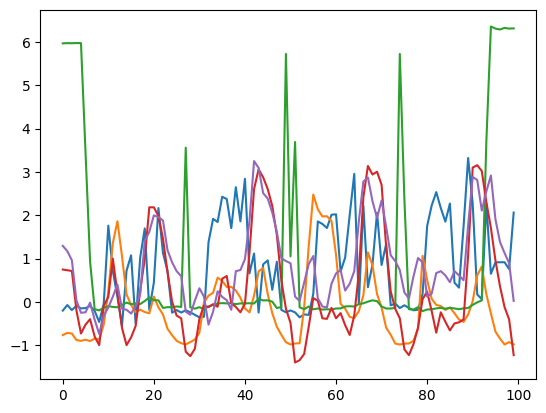

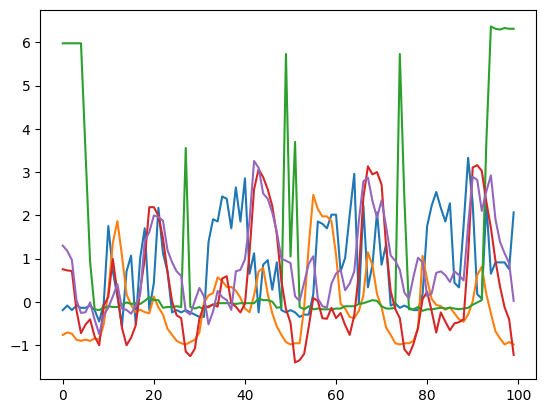

In [50]:
import matplotlib.pyplot as plt

for series in data[:5]:
    plt.plot(series)
plt.show()

for series in list(dataset["train"])[:5]:
    plt.plot(series["target"][:100])
plt.show()